Todas as perguntas se referem ao sinal x(t) = cos(2π3200t) + 0, 5 ∗ cos(2π600t) + 0, 01 cos(2π300t).

Problema 1: Determine a frequência de amostragem e mostre como ficam as amostras
do sinal no tempo e os espectros do sinal original e do sinal amostrado.

Problema 2: Para a frequência que voce escolheu (Fs), mostre como fica o sinal recuperado
das amostras obtidas com Fs/4, Fs/2.

Problema 3: Considere que a frequência de amostragem foi de F s = 6ksps. Aplique a
decimação no sinal amostrado pelos fatores L = 2, L = 5 e L = 10 e esboce como fica o
espectro do sinal após a decimação.

Problema 4: Considere que a frequência de amostragem foi de F s = 6ksps. Aplique a
interpolação no sinal amostrado pelos fatores M = 2, M = 5 e M = 10 e esboce como
fica o espectro do sinal após a decimação.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
import math
import pandas as pd
import importlib.util
from scipy import fftpack as fft
from scipy.signal import find_peaks


# Problema 1

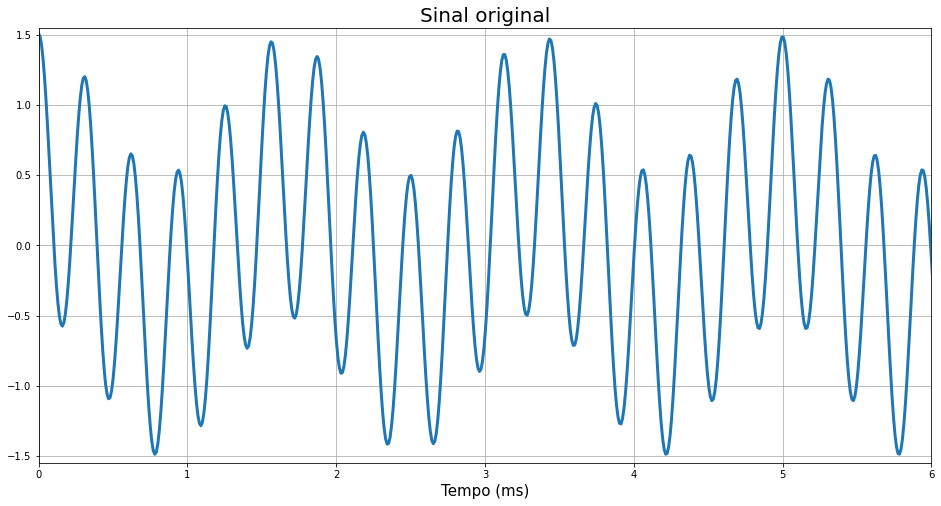

In [32]:
# Analisando apenas a parte positiva

figure1 = plt.figure(figsize=(16,8))
t = np.linspace(0, 1e-2, 1000)
sinal = np.cos(2*np.pi*3200*t) +  0.5*np.cos(2*np.pi*600*t) + 0.01*np.cos(2*np.pi*300*t)
plt.xlim(0,6)
plt.title('Sinal original', size = 20)
plt.xlabel('Tempo (ms)', size = 15)
plt.ylim(-1.55, 1.55)
plt.grid()
plt.plot(t*1e3, sinal, linewidth = 3)

In [33]:
T = 5e-3
F = 1/T
print('A frequência do sinal é de ' + str(F) + 'Hz')
print('O período da função é de ' + str(T) + 's ou ' + str(T*1e3) + str('ms'))
print('A frequência mínima de Amostragem é de '+ str(3200*2) + 'Hz')

A frequência do sinal é de 200.0Hz
O período da função é de 0.005s ou 5.0ms
A frequência mínima de Amostragem é de 6400Hz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


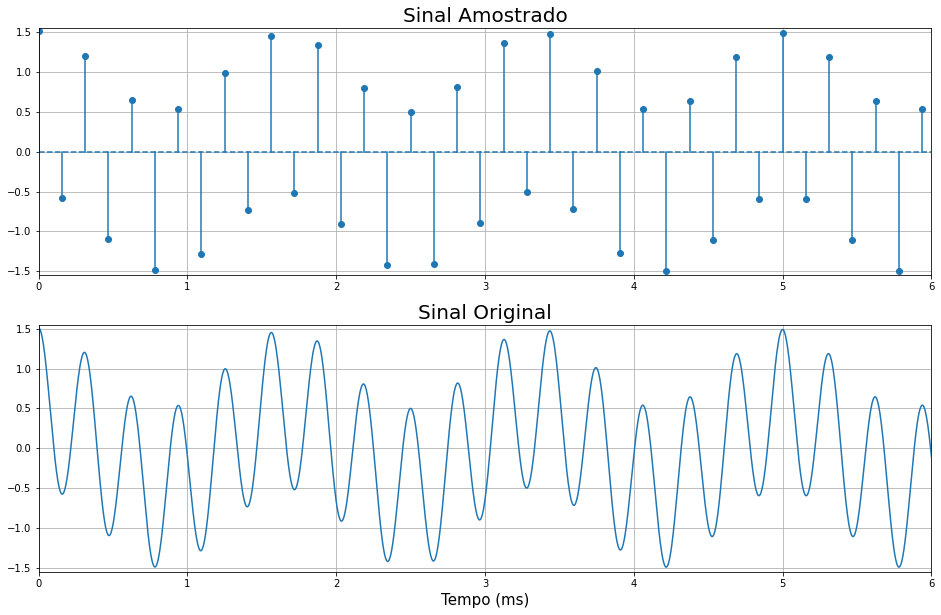

In [34]:
# Escolhendo uma frequência de amostragem de 6600Hz (Maior que a frequência mínima)
figure2 = plt.figure(figsize=(16,10))

T = 5e-3
Ts = 1/6400
N = 2*(np.floor(T/Ts) + 1) # Número de amostras
t = np.linspace(0, N*Ts, 3200)
n = np.arange(0, N*Ts, Ts)

sinal = np.cos(2*np.pi*3200*t) +  0.5*np.cos(2*np.pi*600*t) + 0.01*np.cos(2*np.pi*300*t)
sinalA = np.cos(2*np.pi*3200*n) +  0.5*np.cos(2*np.pi*600*n) + 0.01*np.cos(2*np.pi*300*n)

# Analisando apenas a parte positiva

plt.subplot(211)
plt.stem(1e3*n, sinalA, basefmt = '--') # Sinal amostrado
plt.title('Sinal Amostrado', size = 20)
plt.ylim(-1.55, 1.55)
plt.xlim(0,6)
plt.grid()

plt.subplot(212)
plt.plot(1e3*t, sinal) # Sinal Original
plt.xlim(0,6)
plt.title('Sinal Original', size = 20)

plt.xlabel('Tempo (ms)', size = 15)
plt.ylim(-1.55, 1.55)
plt.grid()

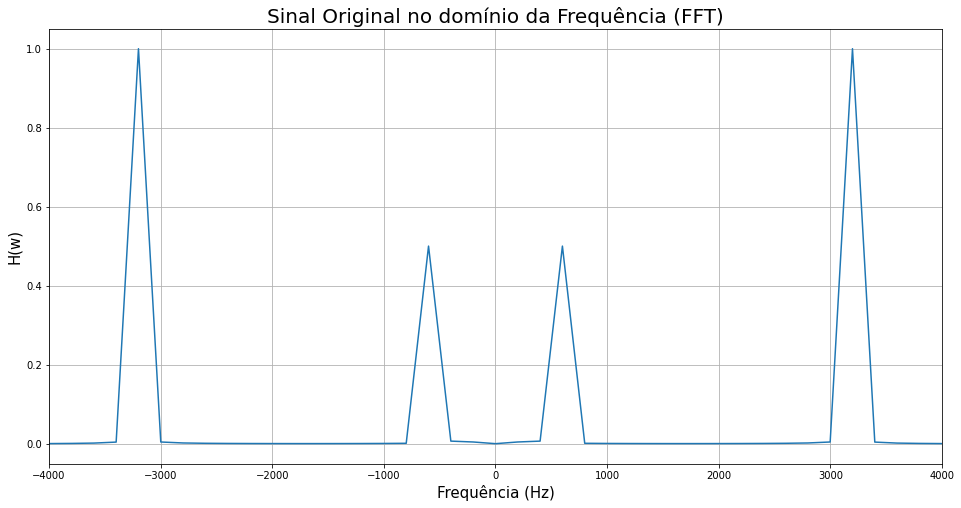

In [191]:
figure3 = plt.figure(figsize = (16,8))

t = np.linspace(0, T, 3200)
sinal = np.cos(2*np.pi*3200*t) +  0.5*np.cos(2*np.pi*600*t) + 0.01*np.cos(2*np.pi*300*t)

freq = np.fft.fftfreq(len(sinal), t[1] - t[0]) #Utilizando as funções de FFT da biblioteca numpy
fft_s = np.fft.fft(sinal)

plt.plot(np.fft.fftshift(freq), np.fft.fftshift(abs(fft_s/fft_s.max())))

plt.xlim(-4000,4000)
plt.title('Sinal Original no domínio da Frequência (FFT)', size = 20)
plt.xlabel('Frequência (Hz)', size = 15)
plt.ylabel('H(w)', size = 15)
#plt.ylim(0, 4000)
plt.grid()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


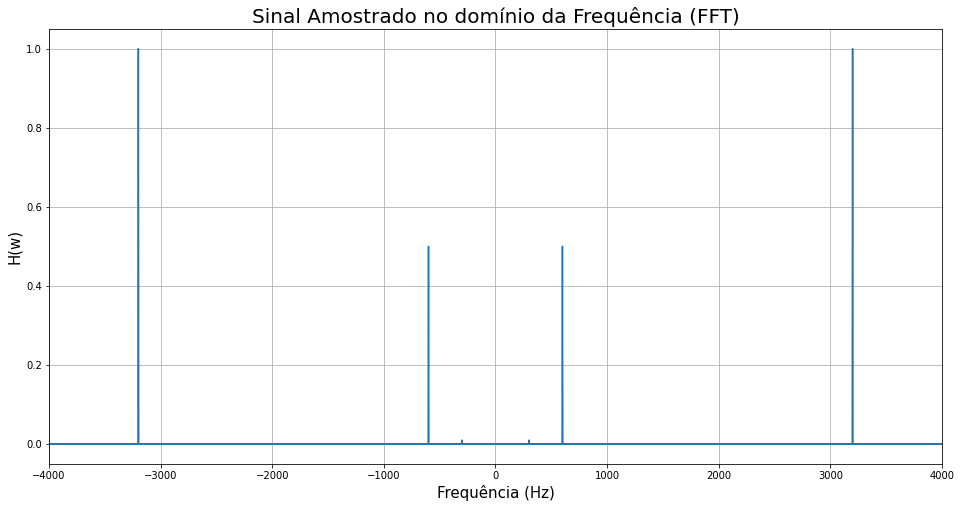

In [188]:
figure4 = plt.figure(figsize = (16,8))
Ts = 1/8000 # Escolhendo a frequência de Amostragem como 8000Hz
n = np.arange(0, N*T, step = Ts)
sinalA = np.cos(2*np.pi*3200*n) +  0.5*np.cos(2*np.pi*600*n) + 0.01*np.cos(2*np.pi*300*n)

freq = np.fft.fftfreq(len(n), Ts)
fft_a = np.fft.fft(sinalA)

plt.plot(freq, np.abs(fft_a)/fft_a.max())

plt.xlim(-4000,4000)
plt.title('Sinal Amostrado no domínio da Frequência (FFT)', size = 20)
plt.xlabel('Frequência (Hz)', size = 15)
plt.ylabel('H(w)', size = 15)
#plt.ylim(0, 600)
plt.grid()

# Problema 2

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


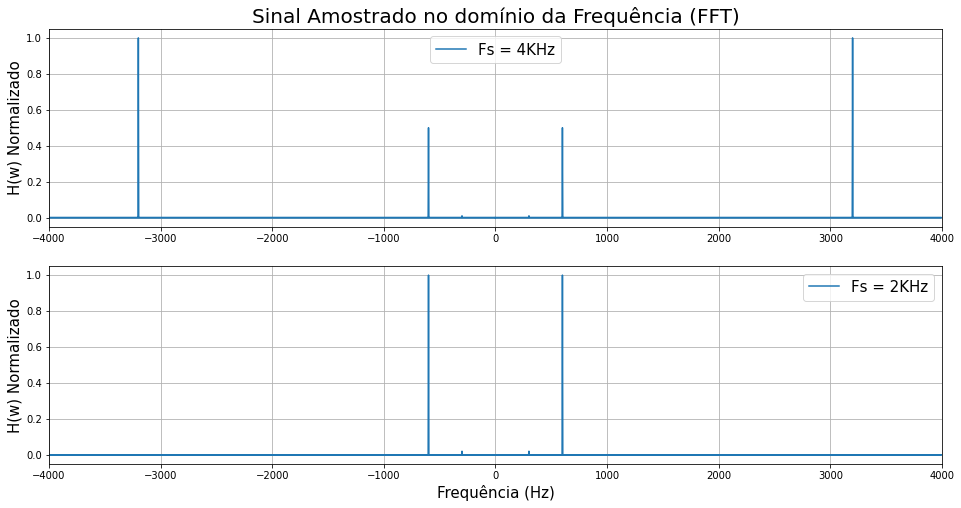

In [190]:
figure5 = plt.figure(figsize = (16,8))
freq = np.fft.fftfreq(len(n), Ts)
fs_4 = fft_a.copy() # Copiando a fft
fs_4[np.abs(freq) > 2000] = 0 # Filtrando todos os valores acima de 2kHz

fs_2 = fft_a.copy()
fs_2[np.abs(freq) > 4000] = 0

plt.subplot(211)
plt.plot(freq, abs(fs_2)/fs_2.max(), label = 'Fs = 4KHz')
plt.title('Sinal Amostrado no domínio da Frequência (FFT)', size = 20)
plt.xlim(-4000,4000)
plt.ylabel('H(w) Normalizado', size = 15)
plt.grid()
plt.legend(fontsize = 15)

plt.subplot(212)
plt.plot(freq, abs(fs_4)/fs_4.max(), label = 'Fs = 2KHz')
plt.xlabel('Frequência (Hz)', size = 15)
plt.xlim(-4000,4000)
plt.ylabel('H(w) Normalizado', size = 15)
plt.grid()
plt.legend(fontsize = 15)

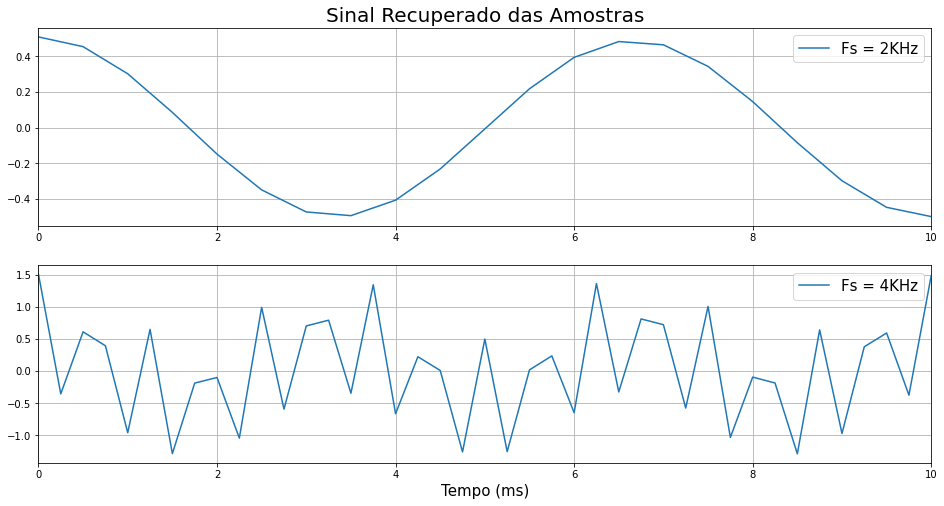

In [128]:
figure6 = plt.figure(figsize = (16,8))
sinalfs4 = fft.ifft(fs_4) # Fazendo a transformada inversa
sinalfs2 = fft.ifft(fs_2)

T = 5e-3
Ts2 = 1/4000
N2 = int(2*(np.floor(T/Ts2) + 1))
Ts4 = 1/2000
N4 = int(2*(np.floor(T/Ts4) + 1))

n4 = np.arange(0, N4*Ts4, Ts4) # Criando novos indices de tempo
n2 = np.arange(0, N2*Ts2, Ts2)
s4 = np.zeros(N4)
s2 = np.zeros(N2)

for i in range(N4):
  s4[i] = np.real(sinalfs4[i]) # Pegando apenas a parte real com o número de amostras desejado

for i in range(N2):
  s2[i] = np.real(sinalfs2[i])


plt.subplot(211)
plt.plot(1e3*n4, s4, label = 'Fs = 2KHz')
plt.title('Sinal Recuperado das Amostras', size = 20)
plt.xlim(0,10)
plt.grid()
plt.legend(fontsize = 15)

plt.subplot(212)
plt.plot(1e3*n2, s2, label = 'Fs = 4KHz')
plt.xlabel('Tempo (ms)', size = 15)
plt.xlim(0,10)
plt.grid()
plt.legend(fontsize = 15)

# Problema 3

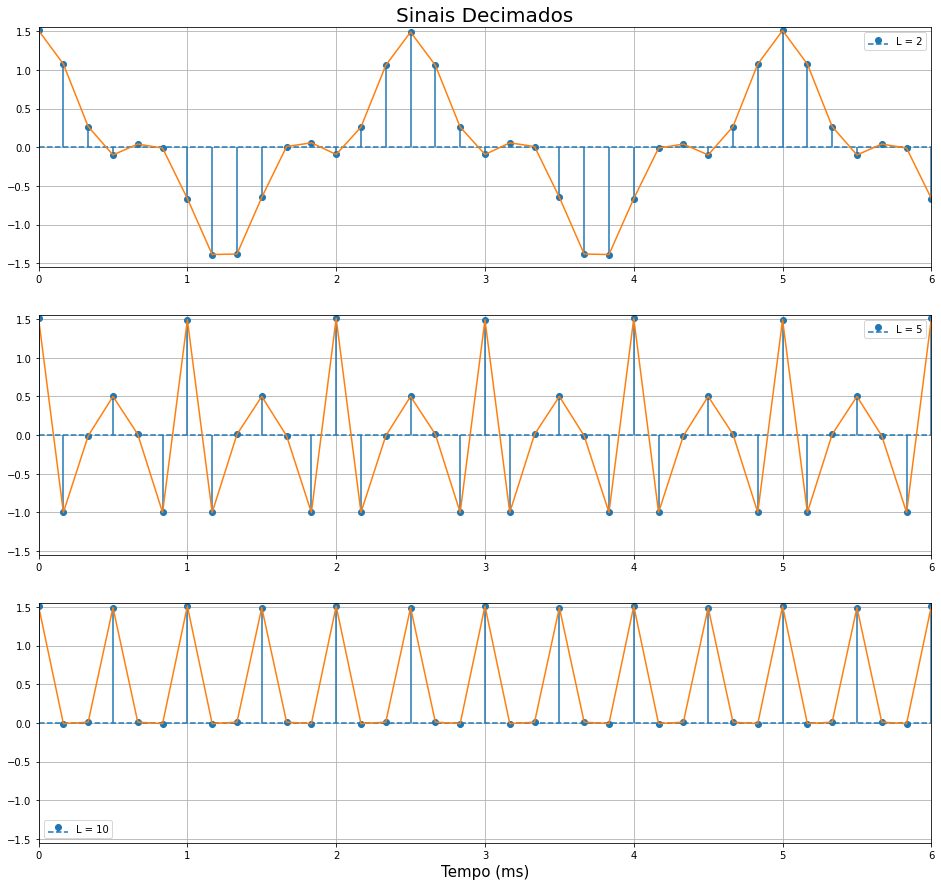

In [210]:

figure7 = plt.figure(figsize=(16,15))

T = 5e-3
Ts = 1/6000
N = 2*(np.floor(T/Ts) + 1) # Número de amostras
n = np.arange(0, 10*N*Ts, Ts)

sinalA = np.cos(2*np.pi*3200*n) +  0.5*np.cos(2*np.pi*600*n) + 0.01*np.cos(2*np.pi*300*n)

SL2 = []
SL5 = []
SL10 = []

for i in range(len(n)): # Realizando a decimação
  if i%2 == 0 :
    SL2.append(sinalA[i])
  if i%5 == 0 :
    SL5.append(sinalA[i])
  if i%10 == 0 :
    SL10.append(sinalA[i])

n2 = np.arange(0, 10*N*Ts/2, Ts) #Definindo os limites de tempo dos arrays
n5 = np.arange(0, 10*N*Ts/5, Ts)
n10 = np.arange(0, 10*N*Ts/10, Ts)
    
plt.subplot(311)
plt.stem(n2*1e3, SL2, basefmt = '--', label = 'L = 2', use_line_collection = True )
plt.plot(n2*1e3, SL2)
plt.title('Sinais Decimados', size = 20)
plt.ylim(-1.55, 1.55)
plt.xlim(0,6)
plt.legend()
plt.grid()

plt.subplot(312)
plt.stem(n5*1e3, SL5, basefmt = '--', label = 'L = 5', use_line_collection = True ) 
plt.ylim(-1.55, 1.55)
plt.plot(n5*1e3, SL5)
plt.xlim(0,6)
plt.legend()
plt.grid()

plt.subplot(313)
plt.stem(n10*1e3, SL10, basefmt = '--', label = 'L = 10',  use_line_collection = True ) 
plt.ylim(-1.55, 1.55)
plt.plot(n10*1e3, SL10)
plt.xlim(0,6)
plt.legend()
plt.xlabel('Tempo (ms)', size = 15)
plt.grid()

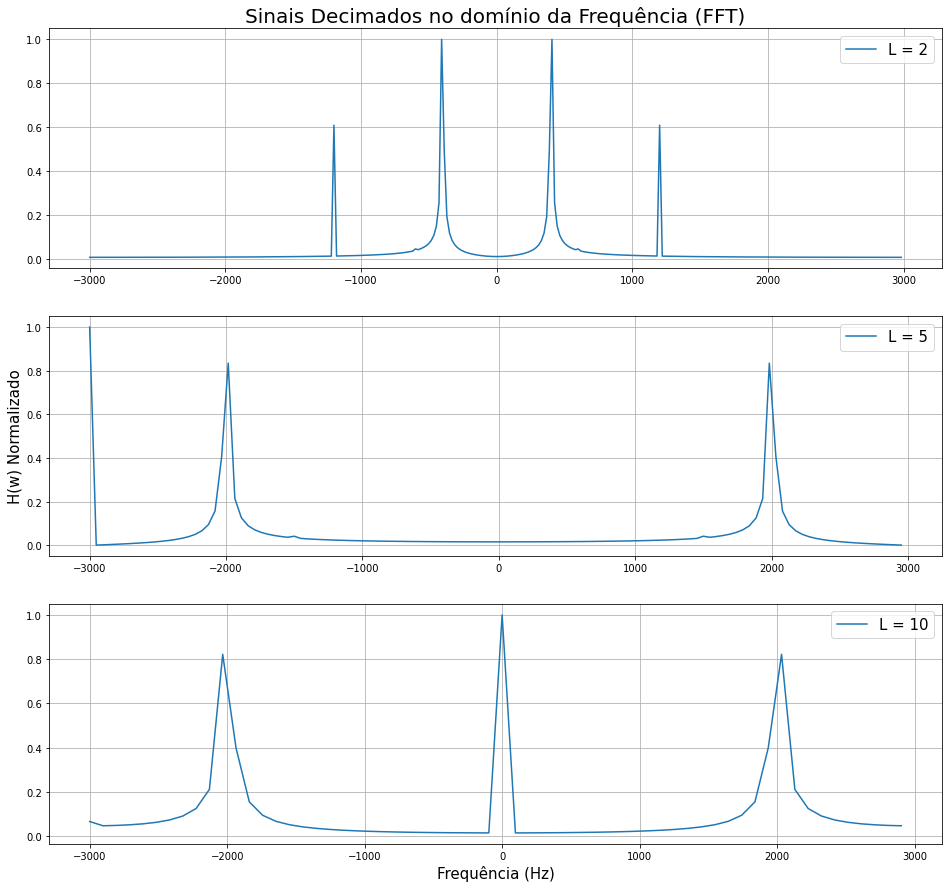

In [208]:

figure8 = plt.figure(figsize=(16,15))

freq2 = np.fft.fftfreq(len(n2), n2[1] - n2[0])
SL2fft = np.fft.fft(SL2)
SL2fft = abs(SL2fft)

freq5 = np.fft.fftfreq(len(n5), n5[1] - n5[0])
SL5fft = np.fft.fft(SL5)

freq10 = np.fft.fftfreq(len(n10), n10[1] - n10[0])
SL10fft = np.fft.fft(SL10)

plt.subplot(311)
plt.plot(np.fft.fftshift(freq2),  np.fft.fftshift(SL2fft/SL2fft.max()), label = 'L = 2') 
plt.title('Sinais Decimados no domínio da Frequência (FFT)', size = 20)
plt.legend(fontsize = 15)
plt.grid()

plt.subplot(312)
plt.plot(np.fft.fftshift(freq5), np.fft.fftshift(abs(SL5fft/SL5fft.max())), label = 'L = 5') 
plt.legend(fontsize = 15) # como o np.arange não inclui o ponto final e o pico do espectro de -3000Hz
# está bem na fronteira, o mesmo acabou não aparecendo espelhado em 3000Hz
plt.ylabel('H(w) Normalizado', size = 15)
plt.grid()

plt.subplot(313)
plt.plot(np.fft.fftshift(freq10), np.fft.fftshift(abs(SL10fft/SL10fft.max())), label = 'L = 10') 
plt.legend(fontsize = 15)
plt.xlabel('Frequência (Hz)', size = 15)
plt.grid()

# Problema 4

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'Frequência (Hz)')

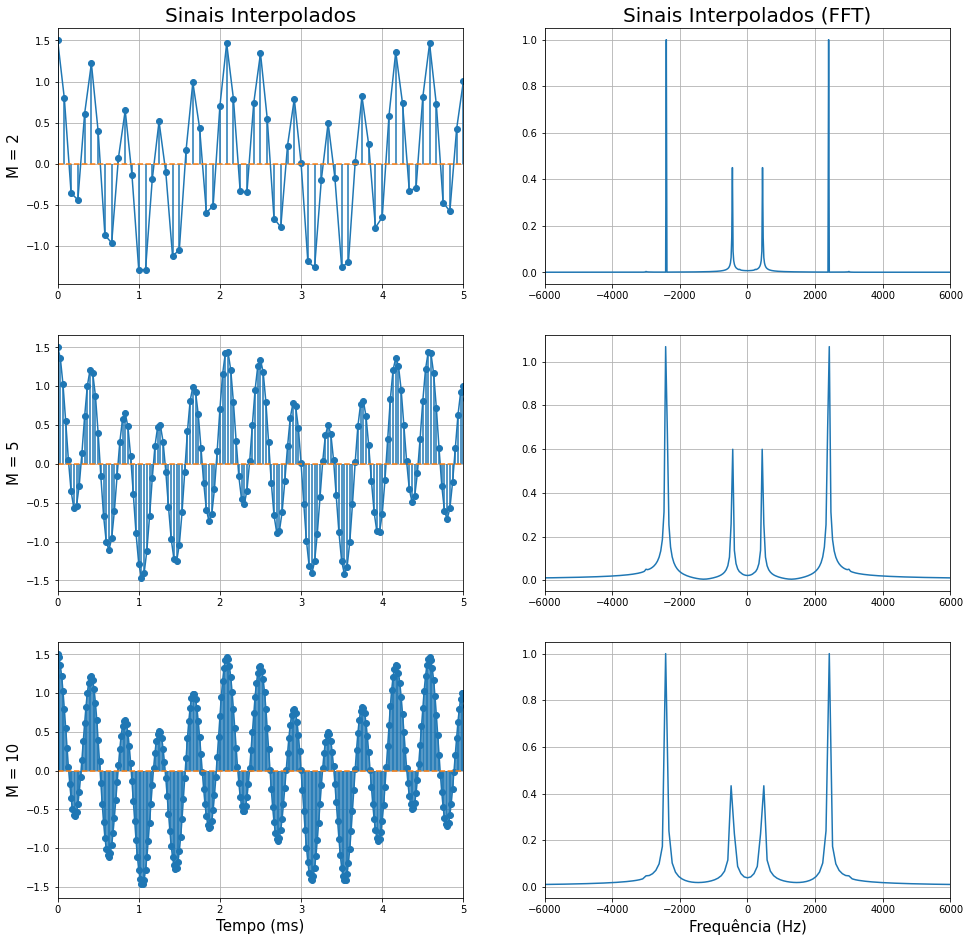

In [193]:
figure9, f = plt.subplots(3, 2, figsize=(16,16))

Ts = 1/6000
Ts2 = Ts/2
Ts5 = Ts/5 
Ts10 = Ts/10 

n2 = np.arange(0, 10*N*Ts2, Ts2) # Cria novos tempos com periodos menores
sinal2 = np.zeros(len(n2)) # Cria sinal vazio

n5 = np.arange(0, 10*N*Ts5, Ts5)
sinal5 = np.zeros(len(n5))

n10 = np.arange(0, 10*N*Ts10, Ts10)
sinal10 = np.zeros(len(n10))

for i in range(len(n2)):
    sinal2 += sinalA[i]*np.sinc(6000*n2 - i) # Realiza interpolação dos sinais

fft2 = np.fft.fft(sinal2) # FFT dos sinais interpolados
f2 = np.fft.fftfreq(len(n2), Ts2)

for i in range(len(n5)):
    sinal5 += sinalA[i]*np.sinc(6000*n5 - i)

fft5 = np.fft.fft(sinal5)
f5 = np.fft.fftfreq(len(n5), Ts5)

for i in range(len(n10)):
    sinal10 += sinalA[i]*np.sinc(6000*n10 - i)

fft10 = np.fft.fft(sinal10)
f10 = np.fft.fftfreq(len(n10), Ts10)

f[0][0].plot(1e3*n2, sinal2)
f[0][0].stem(n2*1e3, sinal2, basefmt = '--', use_line_collection = True )
f[0][0].set_xlim(0,5)
f[0][0].grid()
f[0][0].set_title('Sinais Interpolados', size = 20)
f[0][0].set_ylabel('M = 2', size = 15)

f[1][0].plot(1e3*n5, sinal5)
f[1][0].stem(n5*1e3, sinal5, basefmt = '--', use_line_collection = True ) 
f[1][0].set_xlim(0,5)
f[1][0].grid()
f[1][0].set_ylabel('M = 5', size = 15)

f[2][0].plot(1e3*n10, sinal10)
f[2][0].stem(n10*1e3, sinal10, basefmt = '--', use_line_collection = True )
f[2][0].set_xlim(0,5)
f[2][0].grid()
f[2][0].set_ylabel('M = 10', size = 15)
f[2][0].set_xlabel('Tempo (ms)', size = 15)

f[0][1].plot(np.fft.fftshift(f2), np.fft.fftshift(abs(fft2)/fft2.max())) 
f[0][1].set_xlim(-6000, 6000)
f[0][1].set_title('Sinais Interpolados (FFT)', size = 20)
f[0][1].grid()

f[1][1].plot(np.fft.fftshift(f5), np.fft.fftshift(abs(fft5)/fft5.max())) 
f[1][1].set_xlim(-6000, 6000)
f[1][1].grid()

f[2][1].plot(np.fft.fftshift(f10), np.fft.fftshift(abs(fft10/fft10.max()))) 
f[2][1].set_xlim(-6000, 6000)
f[2][1].grid()
f[2][1].set_xlabel('Frequência (Hz)', size = 15)
